# loading packages 

In [1]:
#!pip install evaluate
#!pip install tensorflow
#!pip install tf_keras

In [2]:


import pandas as pd
import nltk
import matplotlib 
from transformers import DistilBertForSequenceClassification, TrainingArguments, Trainer
import evaluate
import numpy as np
import torch.nn as nn
import tensorflow as tf
import tf_keras as keras
from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
from datasets import Dataset, Features, Value, ClassLabel, Sequence
from transformers import AutoTokenizer, DataCollatorWithPadding, AutoConfig



2025-04-30 03:12:53.188405: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745997173.210274  186670 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745997173.216948  186670 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745997173.234458  186670 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745997173.234477  186670 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745997173.234479  186670 computation_placer.cc:177] computation placer alr

# Data Processing

## Berkeley Data Loading & Preprocessing

In [3]:



berkeley = pd.read_parquet("hf://datasets/ucberkeley-dlab/measuring-hate-speech/measuring-hate-speech.parquet")

columns_relevant =  ['hatespeech', 'text', 'target_race_asian', 'target_race_black', 'target_race_latinx', 'target_race_middle_eastern',
'target_race_native_american', 'target_race_pacific_islander', 'target_race_white', 'target_religion_atheist', 'target_religion_buddhist',
'target_religion_christian', 'target_religion_hindu', 'target_religion_jewish', 'target_religion_mormon', 'target_religion_muslim', 
'target_religion_other', 'target_origin_immigrant', 'target_origin_migrant_worker', 'target_origin_undocumented', 
'target_gender_men', 'target_gender_non_binary', 'target_gender_transgender_men', 'target_gender_transgender_unspecified',
'target_gender_transgender_women', 'target_gender_women', 'target_sexuality_bisexual', 'target_sexuality_gay', 'target_sexuality_lesbian',
'target_sexuality_straight', 'target_sexuality_other', 'target_disability_physical', 'target_disability_cognitive',
'target_disability_neurological', 'target_disability_visually_impaired', 'target_disability_hearing_impaired', 'target_disability_unspecific',
'target_disability_other']

berkeley_columns_relevant = berkeley[columns_relevant]
berkeley_columns_relevant.head()

,hatespeech,text,target_race_asian,target_race_black,target_race_latinx,target_race_middle_eastern,target_race_native_american,target_race_pacific_islander,target_race_white,target_religion_atheist,...,target_sexuality_lesbian,target_sexuality_straight,target_sexuality_other,target_disability_physical,target_disability_cognitive,target_disability_neurological,target_disability_visually_impaired,target_disability_hearing_impaired,target_disability_unspecific,target_disability_other
0,0.0,Yes indeed. She sort of reminds me of the elde...,True,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.0,The trans women reading this tweet right now i...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,Question: These 4 broads who criticize America...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.0,It is about time for all illegals to go back t...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.0,For starters bend over the one in pink and kic...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Non-Hate Text Removal

In [4]:
berkely_hate = berkeley_columns_relevant[berkeley_columns_relevant['hatespeech'] > 0]
berkely_hate




,hatespeech,text,target_race_asian,target_race_black,target_race_latinx,target_race_middle_eastern,target_race_native_american,target_race_pacific_islander,target_race_white,target_religion_atheist,...,target_sexuality_lesbian,target_sexuality_straight,target_sexuality_other,target_disability_physical,target_disability_cognitive,target_disability_neurological,target_disability_visually_impaired,target_disability_hearing_impaired,target_disability_unspecific,target_disability_other
2,2.0,Question: These 4 broads who criticize America...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.0,For starters bend over the one in pink and kic...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2.0,Who the fuck is this insignificant simple mind...,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,2.0,Fuck off you insufferable retarded faggot.,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,2.0,"Worthless whore, these tits with look nice wit...",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135523,1.0,"Lady in the back Blinks when ""her"" camera red ...",False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
135546,1.0,🔥PUBG JAPAN SERIES 🔥Grade2 Day2 6/7 <Round8> 1...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
135547,1.0,لا تتشمت الرجال مسكين يعاني كس امه 😂. يقول يال...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
135548,1.0,#DSSUpliftsTheThirdGender #EmancipationOfEunuc...,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Demographic Column Condensing

In [5]:
lgb_cols = [ 'target_sexuality_bisexual', 'target_sexuality_gay', 'target_sexuality_lesbian', 'target_sexuality_other']

t_cols = ['target_gender_transgender_men', 'target_gender_transgender_unspecified','target_gender_transgender_women']

disability_cols = ['target_disability_physical', 'target_disability_cognitive', 'target_disability_neurological',
'target_disability_visually_impaired', 'target_disability_hearing_impaired', 'target_disability_unspecific', 'target_disability_other']

immigrant_cols = ['target_origin_immigrant', 'target_origin_migrant_worker', 'target_origin_undocumented']


berkely_hate.loc[:, 'Transgender'] = berkely_hate[t_cols].any(axis=1)
berkely_hate.loc[:, 'LGB+'] = berkely_hate[lgb_cols].any(axis=1)
berkely_hate.loc[:, 'Disabled'] = berkely_hate[disability_cols].any(axis=1)
berkely_hate.loc[:, 'Immigrant'] = berkely_hate[immigrant_cols].any(axis=1)


berkely_hate = berkely_hate.copy()
berkely_hate.rename(columns={'target_race_asian': 'Asian', 'target_race_black': 'Black', 'target_race_latinx': 'Latinx', 
'target_race_middle_eastern': 'Middle Eastern', 'target_race_pacific_islander': 'Pacific Islander', 'target_race_white': 'White', 
'target_religion_atheist': 'Atheist', 'target_religion_buddhist': 'Buddhist', 'target_religion_christian':'Christian','target_religion_hindu': 'Hindu', 
'target_religion_jewish': 'Jewish','target_religion_mormon': 'Mormon',
'target_religion_muslim': 'Muslim', 'target_religion_other': 'Other Religion', 'target_gender_men': 'Men', 
'target_gender_non_binary': 'Non-Binary', 'target_gender_women': 'Women', 'target_sexuality_straight': 'Straight', 'target_race_native_american': 'Native American',
}, inplace=True)

berkeley_compressed = berkely_hate.drop(lgb_cols + t_cols + disability_cols + immigrant_cols, axis=1)

berkeley_compressed['hatespeech'] = berkeley_compressed['hatespeech'].apply(lambda x: 1 if x > 0 else 0)
berkeley_compressed

/scratch/slurm-14174/ipykernel_186670/2584169070.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  berkely_hate.loc[:, 'Transgender'] = berkely_hate[t_cols].any(axis=1)
/scratch/slurm-14174/ipykernel_186670/2584169070.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  berkely_hate.loc[:, 'LGB+'] = berkely_hate[lgb_cols].any(axis=1)
/scratch/slurm-14174/ipykernel_186670/2584169070.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,hatespeech,text,Asian,Black,Latinx,Middle Eastern,Native American,Pacific Islander,White,Atheist,...,Muslim,Other Religion,Men,Non-Binary,Women,Straight,Transgender,LGB+,Disabled,Immigrant
2,1,Question: These 4 broads who criticize America...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1,For starters bend over the one in pink and kic...,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
6,1,Who the fuck is this insignificant simple mind...,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,1,Fuck off you insufferable retarded faggot.,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9,1,"Worthless whore, these tits with look nice wit...",False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135523,1,"Lady in the back Blinks when ""her"" camera red ...",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
135546,1,🔥PUBG JAPAN SERIES 🔥Grade2 Day2 6/7 <Round8> 1...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
135547,1,لا تتشمت الرجال مسكين يعاني كس امه 😂. يقول يال...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
135548,1,#DSSUpliftsTheThirdGender #EmancipationOfEunuc...,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Demographic Distribution Visualization

,Asian,Black,Latinx,Middle Eastern,Native American,Pacific Islander,White,Atheist,Buddhist,Christian,...,Mormon,Other Religion,Men,Non-Binary,Women,Straight,LGB+,Transgender,Disabled,Immigrant
Hate,3651,13699,4370,4464,679,696,3692,254,202,1173,...,237,599,3038,484,10693,1484,7804,1497,2365,5586


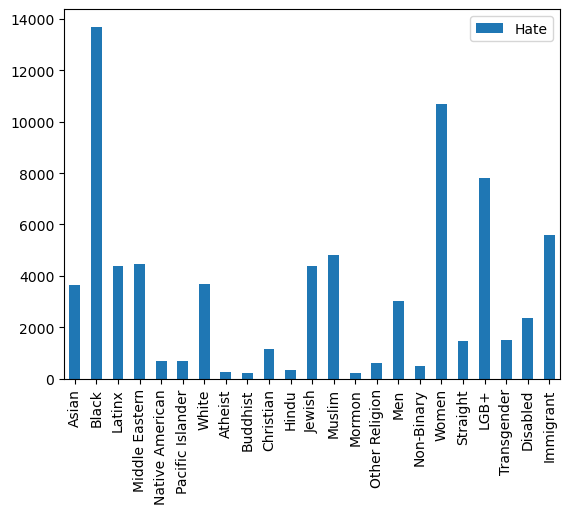

In [6]:
columns_to_sum = ['Asian', 'Black', 'Latinx', 'Middle Eastern', 'Native American', 'Pacific Islander', 'White', 'Atheist', 'Buddhist', 'Christian','Hindu', 'Jewish', 'Muslim', 'Mormon', 'Other Religion', 'Men', 'Non-Binary', 'Women', 'Straight', 'LGB+','Transgender', 'Disabled', 'Immigrant']






hate_counts = berkeley_compressed[columns_to_sum].where(berkeley_compressed['hatespeech'] == 1).sum().to_frame().T


hate_counts.index = ['Hate']


hate_counts.T.plot.bar(stacked=True)
hate_counts.head()


### Multi-Label to Multi-Class

### Removing Low-Frequency Demographics

In [7]:
#removing native american, pacific islander, athiest, buddhist,  hindu, mormon, other religions, non-binary
high_frequency_targets = berkeley_compressed.drop(['Native American', 'Pacific Islander', 'Atheist', 'Buddhist', 
                                                     'Hindu', 'Mormon', 'Other Religion', 'Non-Binary', 'Straight'], axis = 1)
high_frequency_targets

,hatespeech,text,Asian,Black,Latinx,Middle Eastern,White,Christian,Jewish,Muslim,Men,Women,Transgender,LGB+,Disabled,Immigrant
2,1,Question: These 4 broads who criticize America...,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,1,For starters bend over the one in pink and kic...,False,False,False,False,False,False,False,False,False,True,False,False,False,False
6,1,Who the fuck is this insignificant simple mind...,False,False,False,False,True,False,False,False,False,False,False,False,False,False
7,1,Fuck off you insufferable retarded faggot.,False,False,False,False,False,False,False,False,False,False,False,True,False,False
9,1,"Worthless whore, these tits with look nice wit...",False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135523,1,"Lady in the back Blinks when ""her"" camera red ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False
135546,1,🔥PUBG JAPAN SERIES 🔥Grade2 Day2 6/7 <Round8> 1...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
135547,1,لا تتشمت الرجال مسكين يعاني كس امه 😂. يقول يال...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
135548,1,#DSSUpliftsTheThirdGender #EmancipationOfEunuc...,False,False,False,True,False,False,False,False,False,False,False,False,False,False


### Multi-Labeled Demographic Removal

In [8]:
num_identities = high_frequency_targets.loc[:,"Asian":"Immigrant"].sum(axis = 1)
#print(num_identities)
num_identities

multi_identities = num_identities > 1
no_identities = num_identities == 0

berkely_dropped_none =high_frequency_targets[~no_identities]
berkely_dropped_multi = berkely_dropped_none[~multi_identities]

berkely_dropped_multi

/scratch/slurm-14174/ipykernel_186670/868952246.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  berkely_dropped_multi = berkely_dropped_none[~multi_identities]


,hatespeech,text,Asian,Black,Latinx,Middle Eastern,White,Christian,Jewish,Muslim,Men,Women,Transgender,LGB+,Disabled,Immigrant
2,1,Question: These 4 broads who criticize America...,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,1,For starters bend over the one in pink and kic...,False,False,False,False,False,False,False,False,False,True,False,False,False,False
6,1,Who the fuck is this insignificant simple mind...,False,False,False,False,True,False,False,False,False,False,False,False,False,False
7,1,Fuck off you insufferable retarded faggot.,False,False,False,False,False,False,False,False,False,False,False,True,False,False
9,1,"Worthless whore, these tits with look nice wit...",False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135406,1,"Lady in the back Blinks when ""her"" camera red ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False
135435,1,"Lady in the back Blinks when ""her"" camera red ...",False,False,False,False,False,False,False,False,False,False,True,False,False,False
135515,1,"Lady in the back Blinks when ""her"" camera red ...",False,False,False,False,False,False,False,False,False,False,True,False,False,False
135523,1,"Lady in the back Blinks when ""her"" camera red ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False


### Multi-Class Training Dataset Transformation

In [9]:

#multi_class_dummy = high_frequency_targets.astype(int)
multi_class_column = pd.from_dummies(berkely_dropped_multi.loc[:,'Asian':'Immigrant'])
multi_class_column

,
2,Immigrant
4,Women
6,White
7,LGB+
9,Women
...,...
135406,LGB+
135435,Transgender
135515,Transgender
135523,LGB+


In [10]:
multi_class_words = pd.concat([berkely_dropped_multi,multi_class_column], axis = 1)
multi_class_words

,hatespeech,text,Asian,Black,Latinx,Middle Eastern,White,Christian,Jewish,Muslim,Men,Women,Transgender,LGB+,Disabled,Immigrant,
2,1,Question: These 4 broads who criticize America...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Immigrant
4,1,For starters bend over the one in pink and kic...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,Women
6,1,Who the fuck is this insignificant simple mind...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,White
7,1,Fuck off you insufferable retarded faggot.,False,False,False,False,False,False,False,False,False,False,False,True,False,False,LGB+
9,1,"Worthless whore, these tits with look nice wit...",False,False,False,False,False,False,False,False,False,True,False,False,False,False,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135406,1,"Lady in the back Blinks when ""her"" camera red ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,LGB+
135435,1,"Lady in the back Blinks when ""her"" camera red ...",False,False,False,False,False,False,False,False,False,False,True,False,False,False,Transgender
135515,1,"Lady in the back Blinks when ""her"" camera red ...",False,False,False,False,False,False,False,False,False,False,True,False,False,False,Transgender
135523,1,"Lady in the back Blinks when ""her"" camera red ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,LGB+


In [11]:
multi_class_words.columns.values[16] = "label"

multi_class_words

,hatespeech,text,Asian,Black,Latinx,Middle Eastern,White,Christian,Jewish,Muslim,Men,Women,Transgender,LGB+,Disabled,Immigrant,label
2,1,Question: These 4 broads who criticize America...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Immigrant
4,1,For starters bend over the one in pink and kic...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,Women
6,1,Who the fuck is this insignificant simple mind...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,White
7,1,Fuck off you insufferable retarded faggot.,False,False,False,False,False,False,False,False,False,False,False,True,False,False,LGB+
9,1,"Worthless whore, these tits with look nice wit...",False,False,False,False,False,False,False,False,False,True,False,False,False,False,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135406,1,"Lady in the back Blinks when ""her"" camera red ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,LGB+
135435,1,"Lady in the back Blinks when ""her"" camera red ...",False,False,False,False,False,False,False,False,False,False,True,False,False,False,Transgender
135515,1,"Lady in the back Blinks when ""her"" camera red ...",False,False,False,False,False,False,False,False,False,False,True,False,False,False,Transgender
135523,1,"Lady in the back Blinks when ""her"" camera red ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,LGB+


## Arabic Data

In [12]:
arabic_data_with_normal = pd.read_csv('levantine_arabic.csv',sep = ",")
arabic_data_with_normal

,Tweet,Class,english
0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد...,abusive,"Minister Gebran Bassil, crown your head, O Sco..."
1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه...,normal,"My friend, you are a university student. The g..."
2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف...,normal,Lebanon’s interest begins with extracting oil ...
3,وليد جنبلاط كاتب الحكمة يا قذر,abusive,"Walid Jumblatt, writer of wisdom, filthy"
4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشكلك,abusive,What do you think about the word “pig” that is...
...,...,...,...
5841,أمير المليشيا مش خائن,normal,The militia prince is not a traitor
5842,صدقت يناسبك جدا جدا,normal,"You are right, it suits you very well"
5843,لبخليني حب باسيل شغلتين,normal,Basil's love leaves me with two things
5844,ليش تيوس الإمارت والسعودية مع السوريين واليمني...,hate,Why are the goats of the Emirates and Saudi Ar...


### droping normal

In [13]:
normal = arabic_data_with_normal['Class'] == 'normal'
arabic_data = arabic_data_with_normal[~normal]

#arabic_data

## German Data

In [14]:
german_data_with_normal = pd.read_csv('german.csv',sep = ",")
german_data_with_normal

,id,Text,english,Reject Newspaper,Reject Crowd,Rejection Count Crowd,Sexism Count Crowd,Racism Count Crowd,Threat Count Crowd,Insult Count Crowd,Profanity Count Crowd
0,1911223,Niemand braucht Laschet den Merkel Günstling !...,Nobody needs Laschet the Merkel favorite! If s...,0,0,0,NaN,NaN,NaN,NaN,NaN
1,1911225,das war apokalypse now. nicht einmal zu einem ...,that was apocalypse now. It wasn't even enough...,0,0,0,NaN,NaN,NaN,NaN,NaN
2,1911229,Katastrophal - Katastrophal - anders kann d...,Catastrophic - catastrophic - there is NO othe...,0,0,1,0.0,0.0,0.0,0.0,1.0
3,1911239,Dann sollten wir unsere Rüstungsexporte schnel...,Then we should expand our arms exports quickly...,0,0,0,NaN,NaN,NaN,NaN,NaN
4,1911243,"na ja,im notfall sind wir amis ja noch da um z...","Well, in an emergency, we Americans are still ...",0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
84994,2522729,Mein Gott!! Was für ein entsetzliches Gequatsc...,My God!! What horrible nonsense!! The lady be...,1,0,2,2.0,0.0,0.0,1.0,0.0
84995,2522757,Der hat halt auch nichts in der hohlen Birne!!!!!,He doesn't have anything in his head either!!!!!,1,1,3,0.0,0.0,0.0,3.0,0.0
84996,2522763,"Blabla, nehme das Auto...","Blah blah, take the car...",1,0,0,NaN,NaN,NaN,NaN,NaN
84997,2522959,sack reis in china umgefallen...,Sack of rice fell over in China...,1,0,0,NaN,NaN,NaN,NaN,NaN


### droping normal

In [15]:

normal = german_data_with_normal['Reject Newspaper'] == 0
german_data = german_data_with_normal[~normal]

german_data

,id,Text,english,Reject Newspaper,Reject Crowd,Rejection Count Crowd,Sexism Count Crowd,Racism Count Crowd,Threat Count Crowd,Insult Count Crowd,Profanity Count Crowd
49,1911443,das alles ist wie Selbstbefriedigung...denn sc...,all of this is like masturbation... because on...,1,1,4,1.0,0.0,0.0,2.0,4.0
111,1911699,Na Gott sei Dank!!! Wen soll er denn auch besc...,Well thank God!!! Who is he supposed to fool w...,1,0,2,0.0,0.0,0.0,1.0,1.0
172,1911995,"Naja, er kann sich ja schlecht daneben stellen...","Well, it's hard for him to stand next to him a...",1,0,2,0.0,0.0,0.0,1.0,0.0
193,1912109,Oh Gott - jetzt lässt Kellermann auch noch den...,Oh God - now Kellermann is letting the little ...,1,0,0,NaN,NaN,NaN,NaN,NaN
289,1912503,Mal gespannt. als Ausrede warum er niemals be...,Excited. As an excuse for why he was never wi...,1,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
84994,2522729,Mein Gott!! Was für ein entsetzliches Gequatsc...,My God!! What horrible nonsense!! The lady be...,1,0,2,2.0,0.0,0.0,1.0,0.0
84995,2522757,Der hat halt auch nichts in der hohlen Birne!!!!!,He doesn't have anything in his head either!!!!!,1,1,3,0.0,0.0,0.0,3.0,0.0
84996,2522763,"Blabla, nehme das Auto...","Blah blah, take the car...",1,0,0,NaN,NaN,NaN,NaN,NaN
84997,2522959,sack reis in china umgefallen...,Sack of rice fell over in China...,1,0,0,NaN,NaN,NaN,NaN,NaN


## Korean Data

In [16]:
korean_data_with_normal = pd.read_csv('korean.csv',sep = ",")
korean_data_with_normal

,comments,contain_gender_bias,bias,hate,english
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,False,others,hate,(How the current hotel owner feels) Ah 18 I go...
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,False,none,none,....the representative of Korean beauty...so p...
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",False,none,hate,...Naughty people...People who enjoyed other p...
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",False,none,none,"Episodes 1 and 2 were awkward, but after episo..."
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,True,gender,hate,1. Scratching a person’s face with a fingernai...
...,...,...,...,...,...
7891,힘내세요~ 응원합니다!!,False,none,none,Cheer up~ I’m rooting for you!!
7892,힘내세요~~삼가 고인의 명복을 빕니다..,False,none,none,Cheer up~~ I pray that the deceased rest in pe...
7893,힘내세용 ^^ 항상 응원합니닷 ^^ !,False,none,none,Cheer up ^^ I will always support you ^^!
7894,힘내소...연기로 답해요.나도 53살 인데 이런일 저런일 다 있더라구요.인격을 믿습...,False,none,none,Cheer up... I'll answer with acting. I'm 53 ye...


In [17]:
normal = korean_data_with_normal['hate'] == 'none'
korean_data = korean_data_with_normal[~normal]

korean_data

,comments,contain_gender_bias,bias,hate,english
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,False,others,hate,(How the current hotel owner feels) Ah 18 I go...
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",False,none,hate,...Naughty people...People who enjoyed other p...
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,True,gender,hate,1. Scratching a person’s face with a fingernai...
6,"100년안에 남녀간 성전쟁 한번 크게 치룬 후 일부다처제, 여성의 정치참여 금지, ...",True,gender,hate,"Within 100 years, after a major sexual war bet..."
8,10년만에 재미를 느끼는 프로였는데왜 니들때문에 폐지를해야되냐,False,none,offensive,It was a fun show for the first time in 10 yea...
...,...,...,...,...,...
7879,히잌! 기저귀 찬 년들이 군대 군대 주댕이 털고 자빠졌노ㅋ( ° ͜ʖ͡°)╭∩╮,True,gender,hate,Hee! The bitches in diapers got drunk and fell...
7880,히트곡이 없는데 추억팔이가되는 놀라운 조선식 방송국연예매니징ㅋㅋ 기획사 소속사 걍 ...,False,others,hate,Amazing Joseon-style broadcasting entertainmen...
7881,"히트작이래봐야 미사, 발리 두개 정도가 다고 연기력도 그저 그런 수준으로 배우로서 ...",False,none,hate,He is a representative bubble actor who is mor...
7882,힘내라 이쁜 혜선아 다음엔 저런인간 만나지 말고^^;,False,none,offensive,"Cheer up, pretty Hyeseon, next time don’t meet..."


### Korean Hate Speech Visualization

<Axes: xlabel='hate'>

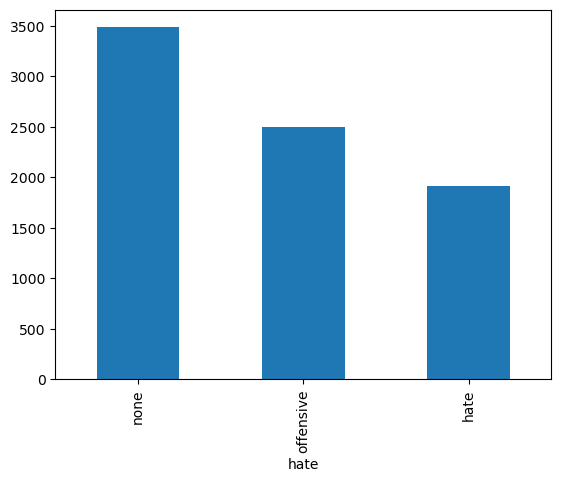

In [18]:
korean_hate_counts = korean_data_with_normal['hate'].value_counts()
korean_hate_counts.plot.bar()

# Multi-Class BERT Model Training

In [19]:



multi_class = multi_class_words.copy()
multi_class = multi_class.rename(columns={'label': 'label'})
encoder = LabelEncoder()
multi_class['label'] = encoder.fit_transform(multi_class['label'])
#multi_class['label_name'] = encoder.inverse_transform(multi_class['label'])
multi_class


,hatespeech,text,Asian,Black,Latinx,Middle Eastern,White,Christian,Jewish,Muslim,Men,Women,Transgender,LGB+,Disabled,Immigrant,label
2,1,Question: These 4 broads who criticize America...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,4
4,1,For starters bend over the one in pink and kic...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,13
6,1,Who the fuck is this insignificant simple mind...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,12
7,1,Fuck off you insufferable retarded faggot.,False,False,False,False,False,False,False,False,False,False,False,True,False,False,6
9,1,"Worthless whore, these tits with look nice wit...",False,False,False,False,False,False,False,False,False,True,False,False,False,False,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135406,1,"Lady in the back Blinks when ""her"" camera red ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,6
135435,1,"Lady in the back Blinks when ""her"" camera red ...",False,False,False,False,False,False,False,False,False,False,True,False,False,False,11
135515,1,"Lady in the back Blinks when ""her"" camera red ...",False,False,False,False,False,False,False,False,False,False,True,False,False,False,11
135523,1,"Lady in the back Blinks when ""her"" camera red ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,6


In [20]:


train_test = Dataset.from_pandas(multi_class).train_test_split(test_size=0.1)

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def preprocess(examples):
    tokenized = tokenizer(examples["text"], truncation=True)
    tokenized["labels"] = examples["label"]
    return tokenized

tokenized_data = train_test.map(preprocess, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Map:   0%|          | 0/34744 [00:00<?, ? examples/s]

Map:   0%|          | 0/3861 [00:00<?, ? examples/s]

## Model Training/Tuning

In [21]:
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=14, problem_type="single_label_classification")



accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")
precision = evaluate.load("precision")
recall = evaluate.load("recall")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

training_args = TrainingArguments(
    output_dir="hatespeech_classifier",
    learning_rate=4e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    warmup_ratio=0.1,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_data["train"],
    eval_dataset=tokenized_data["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/scratch/slurm-14174/ipykernel_186670/2639983234.py:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 3.10.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


In [22]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.462100,0.460790,0.862730


TrainOutput(global_step=2172, training_loss=0.651478632159435, metrics={'train_runtime': 1727.6006, 'train_samples_per_second': 20.111, 'train_steps_per_second': 1.257, 'total_flos': 845720353560576.0, 'train_loss': 0.651478632159435, 'epoch': 1.0})

In [23]:
results = trainer.evaluate(tokenized_data['test'])
pd.DataFrame(results, index=['Fine-tuned DistilBERT'])

,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch
Fine-tuned DistilBERT,0.46079,0.86273,41.2654,93.565,5.864,1.0


# Hate Speech Demographic Classification

## general

In [24]:
def predict_category(text):

    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
    model.to(device)

    predict_input = tokenizer(text,
    truncation=True,
    padding=True,
    return_tensors="pt")

    predict_input = {key: value.to(device) for key, value in predict_input.items()}

    model.eval()
    with torch.no_grad():
        output = model(**predict_input)
        logits = output.logits
        prediction_value = torch.argmax(logits, dim=1).item()
        
    return prediction_value

In [25]:
#unlabelled_data = unlabelled_df['data'].to_list()
#len(unlabelled_data)

## Arabic Predictions

In [25]:
arabic_en = arabic_data['english'].to_list()
len(arabic_en)

2196

In [26]:
arabic_predictions = []
for data in arabic_en:
    #print(data)
    arabic_predictions.append(predict_category(data))
arabic_prediction_df = pd.DataFrame({
        "english": arabic_en,
        "labels": arabic_predictions,
    })

arabic_prediction_df

,english,labels
0,"Minister Gebran Bassil, crown your head, O Sco...",10
1,"Walid Jumblatt, writer of wisdom, filthy",9
2,What do you think about the word “pig” that is...,13
3,We did not hear your screams yesterday regardi...,9
4,"Clean, cow",13
...,...,...
2191,Feel free to run a colt's shed,6
2192,Call hua hua hua client dog,11
2193,"Ok, sir, what can you offer your country other...",4
2194,"And I keep telling you, Maroun Ghoneim, don't ...",13


In [27]:
arabic_prediction_labeled = arabic_prediction_df.copy()
arabic_prediction_labeled['labels'] = encoder.inverse_transform(arabic_prediction_labeled['labels'])
arabic_prediction_labeled

,english,labels
0,"Minister Gebran Bassil, crown your head, O Sco...",Muslim
1,"Walid Jumblatt, writer of wisdom, filthy",Middle Eastern
2,What do you think about the word “pig” that is...,Women
3,We did not hear your screams yesterday regardi...,Middle Eastern
4,"Clean, cow",Women
...,...,...
2191,Feel free to run a colt's shed,LGB+
2192,Call hua hua hua client dog,Transgender
2193,"Ok, sir, what can you offer your country other...",Immigrant
2194,"And I keep telling you, Maroun Ghoneim, don't ...",Women


### evaluation


In [28]:
arabic_prediction_sample = arabic_prediction_labeled.sample(100)
arabic_prediction_sample.to_csv("arabic_model_sample.csv", index=False)

### create csv

In [29]:

arabic_prediction_labeled.to_csv("arabic_model_prediction.csv", index=False)

## German Predictions

In [30]:

german_data = german_data.dropna()


In [31]:
german_data = german_data.rename(columns={'english': 'english'})


german_en = german_data['english'].to_list()
type(german_en)



list

In [32]:
german_predictions = []


for data in german_en:
    german_predictions.append(predict_category(data))

#for data in german_predictions[1:10]:
    #print(len(data))
print(len(german_predictions))


4631


In [33]:
german_prediction_df = pd.DataFrame({
        "english": german_en,
        "labels": german_predictions,
    })

In [34]:
german_prediction_labeled = german_prediction_df.copy()
german_prediction_labeled['labels'] = encoder.inverse_transform(german_prediction_labeled['labels'])
german_prediction_labeled

,english,labels
0,all of this is like masturbation... because on...,Middle Eastern
1,Well thank God!!! Who is he supposed to fool w...,Men
2,"Well, it's hard for him to stand next to him a...",Men
3,The Ossis in Schmalkalden/Suhl live behind the...,Immigrant
4,The perpetrator---again---a Muslim....in addit...,Muslim
...,...,...
4626,The president of this state parliament is the ...,Women
4627,"Quote ""He is too small and too ugly, doesn't e...",Asian
4628,My God!! What horrible nonsense!! The lady be...,Women
4629,He doesn't have anything in his head either!!!!!,Disabled


In [44]:
german_prediction_sample = german_prediction_labeled.sample(100)
german_prediction_sample.to_csv("german_model_sample.csv", index=False)

In [38]:
german_prediction_labeled.to_csv("german_model_labeled.csv", index=False)

## Korean Predictions

In [39]:
korean_en = korean_data['english'].to_list()
len(korean_en)

4410

In [40]:
korean_predictions = []
for data in korean_en:
    korean_predictions.append(predict_category(data))
korean_prediction_df = pd.DataFrame({
        "english": korean_en,
        "labels": korean_predictions,
    })


In [41]:
korean_prediction_labeled = korean_prediction_df.copy()
korean_prediction_labeled['labels'] = encoder.inverse_transform(korean_prediction_labeled['labels'])
korean_prediction_labeled



,english,labels
0,(How the current hotel owner feels) Ah 18 I go...,Immigrant
1,...Naughty people...People who enjoyed other p...,Men
2,1. Scratching a person’s face with a fingernai...,LGB+
3,"Within 100 years, after a major sexual war bet...",Women
4,It was a fun show for the first time in 10 yea...,Women
...,...,...
4405,Hee! The bitches in diapers got drunk and fell...,Women
4406,Amazing Joseon-style broadcasting entertainmen...,Asian
4407,He is a representative bubble actor who is mor...,Asian
4408,"Cheer up, pretty Hyeseon, next time don’t meet...",Asian


In [42]:
korean_prediction_labeled.to_csv("korean_model_prediction.csv", index=False)

In [45]:
korean_prediction_sample = korean_prediction_labeled.sample(100)
korean_prediction_sample.to_csv("korean_model_sample.csv", index=False)